# Lab 6: Hypothesis Testing

## Due Monday, November 27th at 11:59PM

Welcome to Lab 6! In this assignment, we'll develop a further understanding of hypothesis testing, which you can learn more about in [CIT 11](https://inferentialthinking.com/chapters/11/Testing_Hypotheses.html). The relevant lectures are Lectures 19, 20, and 21.

You should complete this entire lab so that all tests pass and submit it to Gradescope by 11:59PM on the due date.

In [1]:
import numpy as np
import babypandas as bpd
import math

import matplotlib.pyplot as plt
plt.style.use('ggplot')

import otter
grader = otter.Notebook()

## 1. Therapeutic Touch 👆

Therapeutic Touch (TT) is an energy therapy that practitioners claim can promote health and relaxation. Practitioners place their hands near a patient and say they are able to detect and manipulate the patient's so-called Human Energy Field (HEF). 
TT was popular throughout the 20th century and was touted as a great way to bring balance to a person's health. You can [read more about TT here](https://www.mountsinai.org/health-library/treatment/therapeutic-touch).

### Emily Rosa's Experiment

In 1996, Emily Rosa was a 9 year old who had wide exposure to the world of TT due to her parents, who were both medical practitioners and skeptics of the idea of TT. For her 4th grade science fair project, Emily decided to test whether or not TT practitioners could truly interact with a person's HEF. 

Emily's experiment was clean, simple, and effective. Due to her parents' occupations in the medical field, she had easy access to TT practitioners. With each practitioner, she performed the following experiment several times over several days.

1. First, she would separate herself from the practitioner with a board, so they couldn't see each other.
1. Then she'd ask them to place both of their hands through an opening in the board. 
1. Emily would flip a fair coin to randomly determine whether to place her hands near the practitioner's left hand or right hand. 
1. Finally, Emily would ask the TT practitioner to specify whether they could detect Emily's Human Energy Field (HEF) near their left hand or their right hand. 

Overall, Emily performed 280 experiments, and the practitioner picked the correct hand 123 times.

Emily's main goal here was to test whether or not the TT practitioners' guesses were random, like the flip of a coin. In most medical experiments, this is the norm. We want to test whether or not some treatment has an effect. This is *not* the same as testing whether the treatment actually works as intended. 

We will now begin to formulate Emily's experiment in terms of the hypothesis terminology we've learned recently.

<!-- BEGIN QUESTION -->

**Question 1.1.** What are the null and alternative hypotheses for Emily's experiment? Write both of your answers in the cell below.

<!--
BEGIN QUESTION
name: q1_1
manual: true
-->

The null hypothesis is: Therapeutic Touch does work.<br>
The alternative hypothesis is: Theraputic Touch does not work.

<!-- END QUESTION -->



**Question 1.2.** Remember that in 280 experiments, the practitioner guessed the correct hand 123 times. According to the null hypothesis, on average, what proportion of times do we expect the practitioner to guess the correct hand? Make sure your answer is between 0 and 1. 

In [2]:
expected_correct = 140 / 280
expected_correct

0.5

In [3]:
grader.check("q1_2")

q1_2 results: All test cases passed!

The goal now is to see if our deviation from this expected proportion of correct answers is due to something other than chance. 

**Question 1.3.** Which of the following is the best statistic for testing this model? Assign `best_stat` to 1, 2, or 3.

1. The difference between the expected proportion of correct answers and the actual proportion of correct answers.
2. The absolute difference between the expected proportion of correct answers and the actual proportion of correct answers.
3. The sum of the expected proportion of correct answers and the actual proportion of  correct answers.

In [4]:
best_stat = 2

In [5]:
grader.check("q1_3")

q1_3 results: All test cases passed!

***Note:*** If you initially answered 1.3 incorrectly, take some time to review the [coin flipping example in Lecture 20](https://dsc10.com/resources/lectures/lec20/lec20.html#Example:-Is-our-coin-fair?) before proceeding.

**Question 1.4.** Complete the implementation of the function `calculate_test_stat`, which takes in an expected proportion and an actual proportion and returns the value of the test statistic you chose (as a proportion between 0 and 1). Assume that both inputs are proportions between 0 and 1.

In [6]:
def calculate_test_stat(expected_prop, actual_prop):
    return abs(expected_prop - actual_prop)

In [7]:
grader.check("q1_4")

q1_4 results: All test cases passed!

**Question 1.5.** Use your newly defined function to calculate the observed test statistic for Emily's experiment. 

In [8]:
observed_test_stat = calculate_test_stat(expected_correct, (123/280))
observed_test_stat

0.06071428571428572

In [9]:
grader.check("q1_5")

q1_5 results: All test cases passed!

**Is this test statistic likely if the null hypothesis is true? Or is the deviation from the expected proportion due to something other than chance?**

In order to answer this question, we need to see how our test statistic would come out if the null hypothesis were true, to see if our observed test statistic is similar. Therefore, we will simulate Emily's experiment assuming that the null hypothesis is true, and calculate the test statistic for each simulation. 

**Question 1.6.** To begin simulating, start by creating an array which has two items in it. The first item should be the proportion of times, assuming the null hypothesis is true, a TT practitioner detects Emily's HEF correctly. The second item should be the proportion of times, under the same assumption, that the TT practitioner makes an incorrect guess. Assign `model_proportions` to this array. 

After this, use the `np.random.multinomial` function to simulate Emily repeating her experiment 280 times (the same nuber of experiments she did in real life), and assign the proportion of correct guesses to `simulation_proportion`. Lastly, define `one_simulated_test_stat` to be the test statistic of this one simulation. 

***Hint:*** See Lecture 20 or [the documentation for `np.random.multinomial`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.multinomial.html) for guidance.

In [10]:
model_proportions = np.array([0.5, 0.5])

simulation_proportion =np.random.multinomial(280, model_proportions)[0] / 280
    
one_simulated_test_stat = abs(0.5 - simulation_proportion)
one_simulated_test_stat

0.0035714285714285587

In [11]:
grader.check("q1_6")

q1_6 results: All test cases passed!

**Question 1.7.** Let's now see what the distribution of test statistics is actually like under our null hypothesis. Assign `simulated_test_stats` to an array of 10,000 test statistics that you simulate, under the assumption that the null hypothesis is true.

***Hint:*** You'll need to re-use most of the code you wrote in 1.6.

In [12]:
num_repetitions = 10_000
simulated_test_stats = np.array([])

for i in np.arange(num_repetitions):
    simulation = np.random.multinomial(280, model_proportions)[0] / 280
    simulated_test_stats = np.append(simulated_test_stats, abs(0.5 - simulation))
    
simulated_test_stats

array([0.025     , 0.00357143, 0.025     , ..., 0.01071429, 0.08214286,
       0.01428571])

In [13]:
grader.check("q1_7")

q1_7 results: All test cases passed!

Let's view the distribution of the simulated test statistics under the null, to see how the observed test statistic compares to the simulated ones. 

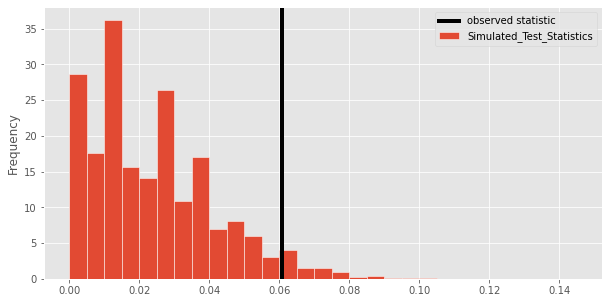

In [14]:
t = bpd.DataFrame().assign(Simulated_Test_Statistics=simulated_test_stats)
t.plot(kind='hist', density=True, ec='w', bins=np.arange(0, 0.15, 0.005), figsize=(10, 5))
plt.axvline(x=observed_test_stat, color='black', label='observed statistic', linewidth=4)
plt.legend();

We can make a visual argument as to whether or not we believe the observed test statistic is likely to occur under the null, or we can use the definition of p-values to help us make a more formal argument. 

**Question 1.8.** First, let's remember what a p-value is. Assign `p_def` to the integer corresponding to the correct definition of a p-value. 

1. The chance, under the null hypothesis, that the test statistic is equal to the value that was observed.
2. The chance, under the null hypothesis, that the test statistic is equal to the value that was observed or is even further in the direction of the alternative.
3. The chance, under the alternative hypothesis, that the test statistic is equal to the value that was observed or is even further in the direction of the null.
4. The number of times, under the null hypothesis, that the test statistic is equal to the value that was observed or is even further in the direction of the alternative.

In [15]:
p_def = 2

In [16]:
grader.check("q1_8")

q1_8 results: All test cases passed!

**Question 1.9.** Using the definition above, calculate the p-value for Emily's experiment and assign it to `emily_p_val`. 

***Hint:*** Do large values of our test statistic make you lean towards the null or alternative? Refer to Lecture 20 or [CIT 11.1](https://inferentialthinking.com/chapters/11/1/Assessing_a_Model.html) for examples.

In [17]:
emily_p_val = np.count_nonzero(simulated_test_stats >= observed_test_stat) / len(simulated_test_stats)
emily_p_val

0.0464

In [18]:
grader.check("q1_9")

q1_9 results: All test cases passed!

Since we want to be very sure about the effectiveness of medical treatments, let's use a significance level of 0.01, the standard convention for being "highly statistically significant." This means that if our p-value is less than or equal to 0.01, then we reject the null hypothesis in favor of the alternative. Otherwise, we fail to reject the null hypothesis. **Note that this does not mean we accept the null hypothesis as correct, but rather, that we don't have enough evidence to reject it.**

Your p-value and this convention should help you make your own conclusions about Emily Rosa's experiment. 

Therapeutic Touch fell out of use after this experiment, which was eventually [accepted into a premier medical journal](https://pubmed.ncbi.nlm.nih.gov/9533499/). TT practitioners hit back and accused Emily and her family of tampering with the results, while some claimed that Emily's bad spiritual mood towards Therapeutic Touch made it difficult to read her HEF. Whatever it may be, Emily's experiment is a classic example about how anyone, with the right resources, can test anything they want!

## 2. YouTube Advertisements ▶️

YouTube, the world's largest video sharing platform, generates revenue from advertisements that appear before and during videos.

Suppose that YouTube publicly released a statement revealing that 94% of their advertisements are skippable (meaning that, supposedly, only 6% of their advertisements cannot be skipped). 

King Triton, UCSD's trusty mascot, wanted to test if this claim was accurate. He clicked on several videos, and recorded whether or not the advertisements on each video were skippable. He watched videos until he reached 100 advertisements, and found that 16 of them were unskippable, or only 84% were skippable. King Triton is irritated and believes that YouTube's claim of 94% is too high. Let's investigate!

<!-- BEGIN QUESTION -->

**Question 2.1.** You decide to run a hypothesis test. What are the null and alternative hypotheses for your test? Write both answers in the cell below.

<!--
BEGIN QUESTION
name: q2_1
manual: true
-->

Null Hypothesis: Youtube's claim was accurate. <br>
Alternative Hypothesis: Youtube's claim was not accurate.

<!-- END QUESTION -->



**Question 2.2.** Assign `null_probabilities` to a two-item *array* such that the **first** element is the chance that a YouTube advertisement is **skippable**, and the **second** element is the chance that a YouTube advertisement is **unskippable**, under the assumptions of the **null hypothesis**.

In [19]:
null_probabilities = np.array([0.94, 0.06])
null_probabilities

array([0.94, 0.06])

In [20]:
grader.check("q2_2")

q2_2 results: All test cases passed!

**Question 2.3.** Using the array you defined above, simulate the act of watching 100 YouTube advertisements, 10,000 times. Create an array called `unskippable_counts` containing the **number of unskippable advertisements** in each simulation.

In [24]:
unskippable_counts = np.array([])

for i in np.arange(10_000):
    simulation = np.random.multinomial(100, null_probabilities)[1]
    unskippable_counts = np.append(unskippable_counts, simulation)
    
unskippable_counts

array([7., 2., 8., ..., 4., 7., 8.])

In [25]:
grader.check("q2_3")

q2_3 results: All test cases passed!

Run the cell below to visualize the results of the simulation.

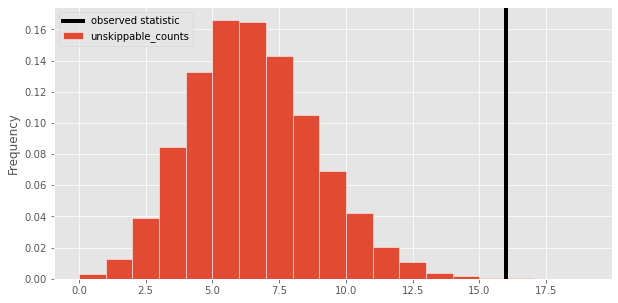

In [26]:
bpd.DataFrame().assign(unskippable_counts = unskippable_counts) \
               .plot(kind='hist', density=True, bins=np.arange(20), ec='w', figsize=(10, 5))
plt.axvline(x=16, color='black', label='observed statistic', linewidth=4)
plt.legend();

**Question 2.4.** Use the results of the simulation to calculate the p-value for this hypothesis test and assign your answer to `unskippable_p_val`.

In [33]:
unskippable_p_val = abs(0.06 - (unskippable_counts / 100).mean())
unskippable_p_val

0.00017300000000000648

In [34]:
grader.check("q2_4")

q2_4 results: All test cases passed!

You should be able to tell, both from the histogram and from the p-value you calculated, that YouTube seems to have more unskippable advertisements than they claim! Perhaps they had a typo in their announcement and meant to say 84% instead of 94%?

## Finish Line 🏁

Congratulations! You are done with Lab 6.

**Citations:** Did you use any generative artificial intelligence tools to assist you on this assignment? If so, please state, for each tool you used, the name of the tool (ex. ChatGPT) and the problem(s) in this assignment where you used the tool for help.

<hr style="color:Maroon;background-color:Maroon;border:0 none; height: 3px;">

Please cite tools here.

<hr style="color:Maroon;background-color:Maroon;border:0 none; height: 3px;">

To submit your assignment:

1. Select `Kernel -> Restart & Run All` to ensure that you have executed all cells, including the test cells.
2. Read through the notebook to make sure everything is fine and all tests passed.
3. Run the cell below to run all tests, and make sure that they all pass.
4. Download your notebook using `File -> Download as -> Notebook (.ipynb)`, then upload your notebook to Gradescope.
5. Stick around while the Gradescope autograder grades your work. Make sure you see that all tests have passed on Gradescope.
6. Check that you have a confirmation email from Gradescope and save it as proof of your submission.

In [35]:
# For your convenience, you can run this cell to run all the tests at once!
grader.check_all()

q1_2 results: All test cases passed!

q1_3 results: All test cases passed!

q1_4 results: All test cases passed!

q1_5 results: All test cases passed!

q1_6 results: All test cases passed!

q1_7 results: All test cases passed!

q1_8 results: All test cases passed!

q1_9 results: All test cases passed!

q2_2 results: All test cases passed!

q2_3 results: All test cases passed!

q2_4 results: All test cases passed!